# Reading Data

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
building_structure = pd.read_csv('csv_building_structure.csv')
building_ownership = pd.read_csv('csv_building_ownership_and_use.csv')

# Data Cleaning

Creating 1 table from both tables with required features

In [183]:
len(building_structure.columns)

31

In [184]:
building_structure.drop(['condition_post_eq', 'technical_solution_proposed'], axis = 1, inplace = True)

In [185]:
building_structure.columns.values

array(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'], dtype=object)

In [186]:
building_structure.drop(['count_floors_post_eq', 'height_ft_post_eq'],axis = 1, inplace = True)

In [187]:
len(building_structure.columns.values)

27

In [188]:
building_structure.shape

(762106, 27)

In [189]:
building_ownership.columns.values

array(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'],
      dtype=object)

In [190]:
building_ownership.shape

(762106, 17)

In [191]:
building_ownership.drop(['district_id', 'vdcmun_id', 'ward_id'], axis = 1 , inplace = True)

In [192]:
building_ownership.shape

(762106, 14)

In [193]:
e_data = pd.merge(building_structure,building_ownership, on = 'building_id')

In [194]:
e_data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,9,288,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,15,364,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,20,384,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,20,312,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,30,308,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0


In [195]:
e_data.shape

(762106, 40)

Checking for the null values in the table and their treatment

In [196]:
e_data.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

Because damage grade is what we need to predict damage and NULL values in target variable i.e damage grade cant be imputed  and because the NULL values are really less so we can drop those rows from the table

In [197]:
e_data = e_data.dropna(subset = ['damage_grade'],axis= 0)

In [198]:
e_data.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [199]:
e_data.columns.values

array(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade', 'legal_ownership_status', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_scho

In [200]:
e_data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,9,288,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,15,364,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,20,384,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,20,312,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,30,308,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,0


After dropping the data we have only 1 NULL value in one of the columns so it implies that the rows with empty target variables had NULL in other columns also so the data data collection was not done properly for those houses 

We will treat the missing value in count_families column while treating the outliers


# Outliers and its treatment

In [201]:
#for count_floor_pre_eq
e_data['count_floors_pre_eq'].describe()

count    762094.000000
mean          2.087787
std           0.655104
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

In [202]:
e_data['count_floors_pre_eq'].value_counts()

2    468103
3    166993
1    118899
4      6085
5      1569
6       332
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

In [203]:
e_data[e_data['count_floors_pre_eq']<2]['count_floors_pre_eq'].count()

118899

In [204]:
e_data[e_data['count_floors_pre_eq']>2]['count_floors_pre_eq'].count()

175092

In [205]:
e_data[e_data['count_floors_pre_eq']==2]['count_floors_pre_eq'].count()

468103

Because the data has maximum of 9 floors only so this can be treates as ordinal datatype so no need of outlier removal and visualization

In [206]:
#for age_building

In [207]:
e_data['age_building'].describe()

count    762094.000000
mean         24.325031
std          65.034555
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

In [208]:
e_data[e_data['age_building']==999]['age_building'].count()

3144

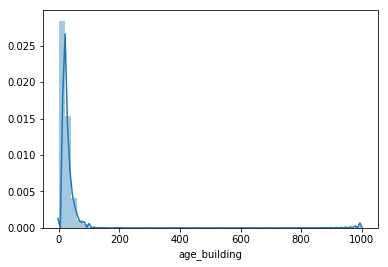

In [209]:
sns.distplot(e_data['age_building'])

In [210]:
pd.crosstab(e_data[e_data['age_building']>100]['age_building'], e_data['damage_grade'])

damage_grade,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
age_building,,,,,
101,2,1,5,13,9
102,0,0,13,16,15
103,0,2,5,8,8
104,0,0,2,8,2
105,2,5,20,49,25
106,0,0,1,5,2
107,0,0,2,2,4
108,0,1,1,4,7
109,0,1,1,1,4


In [211]:
e_data[e_data['age_building']>100]['damage_grade'].value_counts() 

Grade 5    1695
Grade 4    1160
Grade 3     868
Grade 2     434
Grade 1     406
Name: damage_grade, dtype: int64

Because we need only 3 damage categories so we can cap grade 4 and grade 5 to grade 3 in damage_grade column which is our target variable

In [212]:
e_data['damage_grade'] = e_data['damage_grade'].str.replace('Grade','')

In [213]:
e_data['damage_grade'] = e_data['damage_grade'].astype(float).astype(int)
e_data['damage_grade'] = e_data['damage_grade'].apply(lambda x:3 if(x>3) else x)


In [214]:
e_data['damage_grade'].head()

0    3
1    3
2    2
3    2
4    1
Name: damage_grade, dtype: int64

In [215]:
pd.crosstab(e_data[e_data['age_building']>54]['age_building'],e_data['damage_grade'])

damage_grade,1,2,3
age_building,,,
55,51,196,2784
56,11,43,575
57,8,51,572
58,7,43,525
59,7,24,331
60,111,453,6614
61,7,29,386
62,11,42,555
63,5,15,274


In [216]:
#e_data[e_data['age_building']>54]['damage_grade'].value_counts()

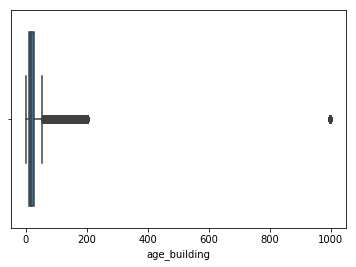

In [217]:
sns.boxplot(e_data['age_building'])

Because there are outliers in the age_building so we will use IQR method(By using Q3+1.5*IQR we get upper whisker = 54) to treat outlier and also the data with age_building >54 have more Grade 3 damage and it is approximately same for al the data so we can cap the age to 54 

In [218]:
#e_data['age_building'] = e_data['age_building'].apply(lambda x:54 if (x>54) else x)

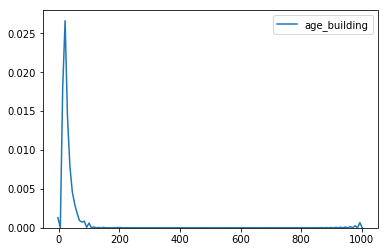

In [219]:
sns.kdeplot(e_data['age_building'])

In [220]:
#for plinth_area_sq_ft

In [221]:
e_data['plinth_area_sq_ft'].describe()

count    762094.000000
mean        406.673668
std         226.780437
min          70.000000
25%         280.000000
50%         358.000000
75%         470.000000
max        5000.000000
Name: plinth_area_sq_ft, dtype: float64

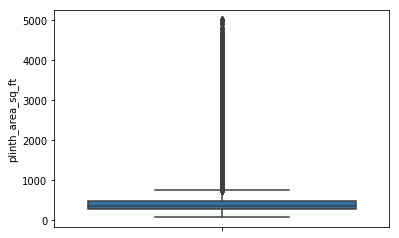

In [222]:
sns.boxplot(e_data['plinth_area_sq_ft'], orient = 'v')

In [280]:
upper_whisker = e_data['plinth_area_sq_ft'].quantile(0.75)+1.5*(e_data['plinth_area_sq_ft'].quantile(0.75)-e_data['plinth_area_sq_ft'].quantile(0.25))
upper_whisker

755.0

In [281]:
e_data[e_data['plinth_area_sq_ft']>e_data['plinth_area_sq_ft'].quantile(0.75)]['damage_grade'].value_counts()

3    130410
1     32018
2     27356
Name: damage_grade, dtype: int64

In [282]:
e_data[e_data['plinth_area_sq_ft']>upper_whisker]['damage_grade'].value_counts()

3    18954
1     9921
2     6228
Name: damage_grade, dtype: int64

Because the data shows same behaviour for the data above upper whisker in plinth_area_sq_ft  so we are capping the outliers to upper whisker

In [285]:
e_data['plinth_area_sq_ft'] = e_data['plinth_area_sq_ft'].apply(lambda x:755 if (x>755) else x)

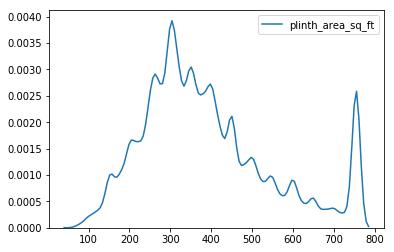

In [286]:
sns.kdeplot(e_data['plinth_area_sq_ft'])

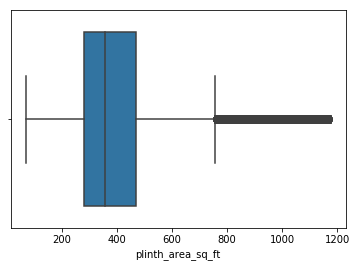

In [279]:
sns.boxplot(e_data['plinth_area_sq_ft'])

In [229]:
#for height_ft_pre_eq

In [230]:
e_data['height_ft_pre_eq'].describe()

count    762094.000000
mean         16.049424
std           5.493900
min           6.000000
25%          12.000000
50%          16.000000
75%          18.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

Because the number of number of floor is dependent on height of building so lets check the relationship through a boxplot 

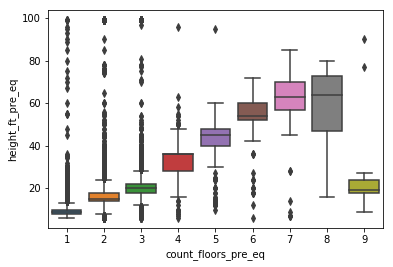

In [231]:
sns.boxplot(e_data['count_floors_pre_eq'],e_data['height_ft_pre_eq'])

No meaningful data is conveyed by the boxplot so we will check the height_ft_pre_eq column for further analysis

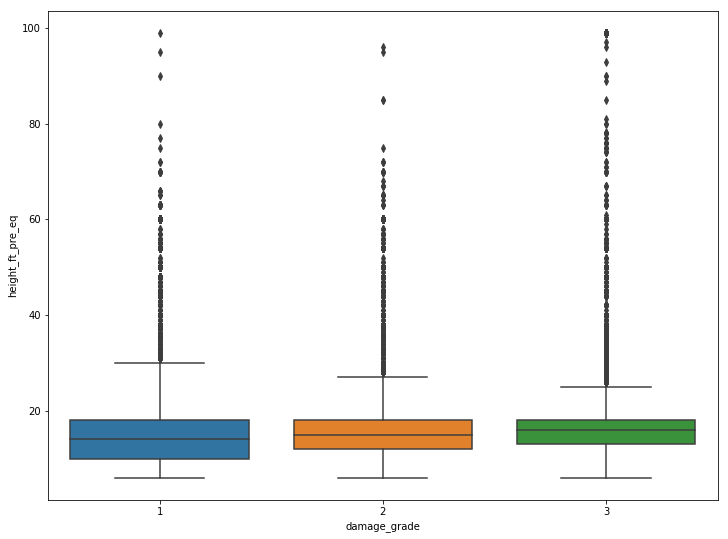

In [232]:
f, ax = plt.subplots(figsize=(12,9))
sns.boxplot(e_data['damage_grade'],e_data['height_ft_pre_eq'])

from the above plot we can see that height of the building doesnot show any significant spread hence the relationship is not much with damage_grade

In [233]:
e_data[['damage_grade','height_ft_pre_eq']].corr()

,damage_grade,height_ft_pre_eq
damage_grade,1.000000,0.061297
height_ft_pre_eq,0.061297,1.000000


Now converting the categorical columns in the required format

In [234]:
#for land_surface_condition
e_data['land_surface_condition'].value_counts()

Flat              631663
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [235]:
def value_change(x):
    if 'Flat' in x:
        return (x.replace('Flat', 'n'))   
    if 'Moderate slope' in x:
        return (x.replace('Moderate slope', 'o'))
    if 'Steep slope' in x:
        return (x.replace('Steep slope', 't'))

In [236]:
e_data['land_surface_condition']=e_data['land_surface_condition'].apply(value_change)
e_data['land_surface_condition'].value_counts()

n    631663
o    105640
t     24791
Name: land_surface_condition, dtype: int64

In [237]:
#for foundation_type
e_data['foundation_type'].value_counts()

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [238]:
def value_change1(x):
    if 'Mud mortar-Stone/Brick' in x:
        return (x.replace('Mud mortar-Stone/Brick', 'h'))   
    if 'Bamboo/Timber' in x:
        return (x.replace('Bamboo/Timber', 'i'))
    if 'Cement-Stone/Brick' in x:
        return (x.replace('Cement-Stone/Brick', 'r'))
    if 'RC' in x:
        return (x.replace('RC', 'u'))
    if 'Other' in x:
        return (x.replace('Other', 'w'))

In [239]:
e_data['foundation_type']=e_data['foundation_type'].apply(value_change1)
e_data['foundation_type'].value_counts()

h    628705
i     57472
r     39245
u     32120
w      4552
Name: foundation_type, dtype: int64

In [240]:
#for roof_type
e_data['roof_type'].value_counts()

Bamboo/Timber-Light roof    503736
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64

In [241]:
def value_change2(x):
    if 'Bamboo/Timber-Light roof' in x:
        return (x.replace('Bamboo/Timber-Light roof', 'n'))   
    if 'Bamboo/Timber-Heavy roof' in x:
        return (x.replace('Bamboo/Timber-Heavy roof', 'q'))
    if 'RCC/RB/RBC' in x:
        return (x.replace('RCC/RB/RBC', 'x'))
   

In [242]:
e_data['roof_type']=e_data['roof_type'].apply(value_change2)
e_data['roof_type'].value_counts()

n    503736
q    213774
x     44584
Name: roof_type, dtype: int64

In [243]:
# for ground_floor_type
e_data['ground_floor_type'].value_counts()

Mud            618205
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [244]:
def value_change3(x):
    if 'Mud' in x:
        return (x.replace('Mud', 'f'))   
    if 'RC' in x:
        return (x.replace('RC', 'm'))
    if 'Brick/Stone' in x:
        return (x.replace('Brick/Stone', 'v'))
    if 'Timber' in x:
        return (x.replace('Timber', 'x'))
    if 'Other' in x:
        return (x.replace('Other', 'z'))

In [245]:
e_data['ground_floor_type']=e_data['ground_floor_type'].apply(value_change3)
e_data['ground_floor_type'].value_counts()

f    618205
m     73149
v     66093
x      3594
z      1053
Name: ground_floor_type, dtype: int64

In [246]:
# for other_floor_type
e_data['other_floor_type'].value_counts()


TImber/Bamboo-Mud    486907
Timber-Planck        123624
Not applicable       118821
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [247]:
def value_change4(x):
    if 'TImber/Bamboo-Mud' in x:
        return (x.replace('TImber/Bamboo-Mud', 'j'))   
    if 'Timber-Planck' in x:
        return (x.replace('Timber-Planck', 'q'))
    if 'Not applicable' in x:
        return (x.replace('Not applicable', 's'))
    if 'RCC/RB/RBC' in x:
        return (x.replace('RCC/RB/RBC', 'x'))
   

In [248]:
e_data['other_floor_type']=e_data['other_floor_type'].apply(value_change4)
e_data['other_floor_type'].value_counts()

j    486907
q    123624
s    118821
x     32742
Name: other_floor_type, dtype: int64

In [249]:
# for position
e_data['position'].value_counts()

Not attached       604443
Attached-1 side    129431
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

In [250]:
def value_change5(x):
    if 'Not attached' in x:
        return (x.replace('Not attached', 'j'))   
    if 'Attached-1 side' in x:
        return (x.replace('Attached-1 side', 'o'))
    if 'Attached-2 side' in x:
        return (x.replace('Attached-2 side', 's'))
    if 'Attached-3 side' in x:
        return (x.replace('Attached-3 side', 't'))

In [251]:
e_data['position']=e_data['position'].apply(value_change5)
e_data['position'].value_counts()

j    604443
o    129431
s     26910
t      1310
Name: position, dtype: int64

In [252]:
# for plan_configuration
e_data['plan_configuration'].value_counts()

Rectangular                        731246
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [253]:
def value_change6(x):
    if 'Rectangular' in x:
        return (x.replace('Rectangular', 'a'))   
    if 'Square' in x:
        return (x.replace('Square', 'c'))
    if 'L-shape' in x:
        return (x.replace('L-shape', 'd'))
    if 'T-shape' in x:
        return (x.replace('T-shape', 'f'))
    if 'Multi-projected' in x:
        return (x.replace('Multi-projected', 'm'))   
    if 'Others' in x:
        return (x.replace('Others', 'n'))
    if 'U-shape' in x:
        return (x.replace('U-shape', 'o'))
    if 'E-shape' in x:
        return (x.replace('E-shape', 'q'))
    if 'Building with Central Courtyard' in x:
        return (x.replace('Building with Central Courtyard', 's'))
    if 'H-shape' in x:
        return (x.replace('H-shape', 'u'))

In [254]:
e_data['plan_configuration'] = e_data['plan_configuration'].apply(value_change6)
e_data['plan_configuration'].value_counts()

a    731246
c     17576
d     10079
f       969
m       940
n       518
o       448
q       140
s        98
u        80
Name: plan_configuration, dtype: int64

In [255]:
# for legal_ownership_status
e_data['legal_ownership_status'].value_counts()

Private          731375
Public            19232
Institutional      7823
Other              3664
Name: legal_ownership_status, dtype: int64

In [256]:
def value_change7(x):
    if 'Private' in x:
        return (x.replace('Private', 'a'))   
    if 'Public' in x:
        return (x.replace('Public', 'r'))
    if 'Institutional' in x:
        return (x.replace('Institutional', 'v'))
    if 'Other' in x:
        return (x.replace('Other', 'w'))

In [257]:
e_data['legal_ownership_status'] = e_data['legal_ownership_status'].apply(value_change7)
e_data['legal_ownership_status'].value_counts()

a    731375
r     19232
v      7823
w      3664
Name: legal_ownership_status, dtype: int64

In [258]:
# for count_families
e_data['count_families'].describe()

count    762093.000000
mean          0.980657
std           0.450210
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: count_families, dtype: float64

In [259]:
e_data['count_families'].value_counts()

1.0     643409
0.0      71576
2.0      39751
3.0       5685
4.0       1215
5.0        302
6.0        104
7.0         27
8.0         15
9.0          8
11.0         1
Name: count_families, dtype: int64

Because there is 1 missing value so we will impute the column with the maximum occuring value which is 1 

In [260]:
e_data['count_families'].fillna(1, inplace = True )
e_data['count_families']= e_data['count_families'].astype(int)


# Data Visualization

Lets check the various relationship between different columns of the table 

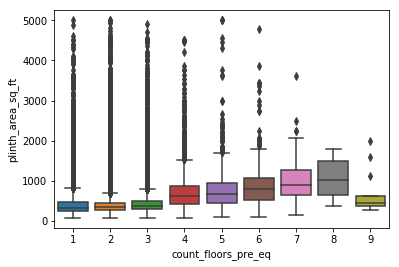

In [261]:
# plinth_area_sq_ft and count_floor_pre_eq

sns.boxplot(e_data['count_floors_pre_eq'], e_data['plinth_area_sq_ft'])

The box plot shows that on an average as the number of floor increases the average  plinth_area_size also increases

In [262]:
cat_cols = list(e_data.select_dtypes(include = ['object']).columns)
dfc = pd.get_dummies(e_data,columns = cat_cols, drop_first = True)


In [263]:
dfc['damage_grade'].value_counts()

3    596022
2     87257
1     78815
Name: damage_grade, dtype: int64

Lets cluster the data to find the grades and see how the machine is clustering the data

In [264]:
from scipy.stats import zscore

In [265]:
dfc[['age_building','plinth_area_sq_ft', 'height_ft_pre_eq']] = dfc[['age_building','plinth_area_sq_ft', 'height_ft_pre_eq']].apply(zscore)

In [266]:
dfc[['age_building','plinth_area_sq_ft', 'height_ft_pre_eq']].head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq
0,-0.235645,-0.523298,-1.283137
1,-0.143386,-0.188172,-1.283137
2,-0.066504,-0.099981,-1.283137
3,-0.066504,-0.417469,-1.283137
4,0.087261,-0.435107,-1.283137


Separating Gorkha district data which will be our test data and rest other district will serve as our test data to predict the damage grade

In [267]:
dfc[dfc['district_id']==36].to_csv('earthquake_test.csv')

In [268]:
dfc[dfc['district_id']!=36].to_csv('earthquake_train.csv')

In [269]:
dfc.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,120101000011,12,1207,120703,1,-0.235645,-0.523298,-1.283137,0,1,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,-0.143386,-0.188172,-1.283137,0,1,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,-0.066504,-0.099981,-1.283137,0,1,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,-0.066504,-0.417469,-1.283137,0,1,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,0.087261,-0.435107,-1.283137,0,1,...,0,0,0,0,0,0,0,0,0,0


In [270]:
X.drop('label', axis =1, inplace = True)

NameError: name 'X' is not defined

In [ ]:
dfc['damage_grade'].value_counts()

In [ ]:
X.head()

With KMeans we cant get desireable output and agglomerative clustering is not working on such a large dataset let us check with other methods

In [ ]:
sns.countplot(e_data['ground_floor_type'], hue = e_data['damage_grade'])

In [ ]:
f, ax = plt.subplots(figsize=(12,9))
sns.countplot(e_data['land_surface_condition'], hue = e_data['damage_grade'])

In [ ]:
f, ax = plt.subplots(figsize=(12,9))
sns.countplot(e_data['land_surface_condition'], hue = e_data['count_floors_pre_eq'])

In [ ]:
f, ax = plt.subplots(figsize=(12,9))
sns.countplot(e_data['count_families'], hue = e_data['damage_grade'])

In [ ]:
sns.countplot(e_data['other_floor_type'], hue = e_data['damage_grade'])

In [ ]:
sns.countplot(e_data['other_floor_type'], hue = e_data['ground_floor_type'])

In [ ]:
e_data.info()

In [ ]:
e_data.shape

In [ ]:
e_data_train = e_data[e_data['district_id']!=36]

In [ ]:
e_data_test = e_data[e_data['district_id']==36]

In [ ]:
X_train = e_data.drop(['building_id', 'district_id', 'vdcmun_id', 'ward_id','damage_grade'], axis = 1)
y_train = e_data['damage_grade']

In [ ]:
e_data_train.to_csv('e_data_train.csv')
e_data_test.to_csv('e_data_test.csv')

In [ ]:
e_data_test['damage_grade'].value_counts()